# Regressione lineare polinomiale

La regressione polinomiale è un caso particolare della regressione lineare multipla, in cui la variabile dipendente viene espressa tramite un polinomio di quella indipendente.

Così facendo potremmo riuscire a interpolare meglio i dati, in quanto aumentando il grado del polinomio oltre l'unità "induciamo" una curvatura che potrebbe rivelarsi preziosa per la predizione.

**N.B**: aumentare il grado del polinomio non vuol dire utilizzare un modello non lineare ! Il modello rimane **lineare** in quanto viene aumentata la potenza nelle variabili indipendenti (features) e non nei pesi !

In questo notebook eseguiremo una regressione polinomiale sul Boston Housing Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Carichiamo il dataset.

In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regressione polinomiale con una feature
Cominciamo eseguendo una regressione polinomiale su di un unica proprietà.<br>
Nel notebook sulla regressione lineare multiplo avevamo visto che RM, LSTAT e PRATIO sono le proprietà maggiormente correlate con MEDV.

Visualizziamo la correlazione su delle coppie di grafici.

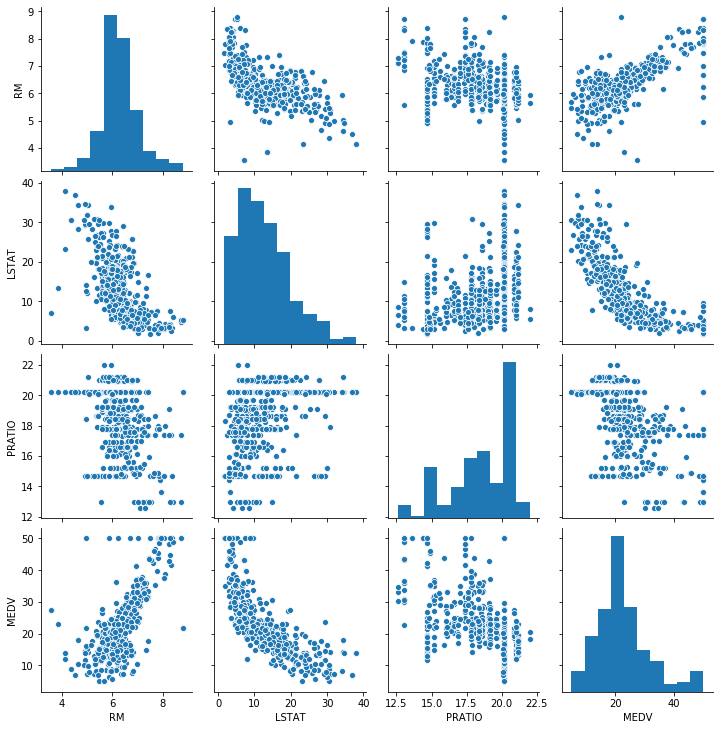

In [3]:
cols = ["RM","LSTAT","PRATIO","MEDV"]
sns.pairplot(boston[cols])

La correlazione tra LSTAT e MEDV è chiaramente non lineare, infatti osservando il secondo grafico della quarta riga si può vedere che le coppie di valori formano una curva.<br><br>
Bene, utilizziamo LSTAT per eseguire una regressione polinomiale, creiamo i nostri train set e test set.

In [4]:
X = boston[['LSTAT']]
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [5]:
Y.shape

(506,)

Per eseguire una regressione lineare polinomiale dobbiamo creare delle nuove proprietà polinomiali, con scikit-learn possiamo farlo utilizzando la classe **PolynomialFeatures**, il resto del processo è esattamente lo stesso.<br>


Eseguiamo 10 diverse regressioni polinomiali, dal grado 1 (regressione lineare semplice) al grado 10, dopodichè confrontiamo il loro MSE e R2 score.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,11):
    # generazione delle nuove proprietà polinomiali
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    # applicazione della regressione lineare (sulle nuove proprietà generate)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("Grado "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

Grado 1: MSE=39.81715050474416 R2=0.5218049526125568
Grado 2: MSE=33.60239474228595 R2=0.5964427754767518
Grado 3: MSE=32.09167657344179 R2=0.6145861618613058
Grado 4: MSE=29.843976067638522 R2=0.6415805408226356
Grado 5: MSE=29.84701333665813 R2=0.6415440639029076
Grado 6: MSE=29.5482979569237 R2=0.6451315686177527
Grado 7: MSE=29.671713627516954 R2=0.6436493740935447
Grado 8: MSE=31.82327509909759 R2=0.6178096033712046
Grado 9: MSE=30.460452196211786 R2=0.6341768007814894
Grado 10: MSE=35.37825532046339 R2=0.5751150882221386


Il nostro modello migliora fino al grado 4, poi comincia a oscillare e peggiorare. Il miglioramente del modello utilizzando una regressione polinomiale è evidente, prendendo come esempio l'R2 score, al grado 1 questo è di appena 0.5218 per arrivare fino ad 0.6416 al grado 4, utilizzando un'unica feature !

## Regressione polinomiale con tutte le features
Adesso ripetiamo l'intero processo, ma questa volta utilizzando tutte le features del dataset.

In [7]:
X = boston.drop('MEDV',axis=1)
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

scores = []

for i in range(1,5):
    # generazione delle nuove proprietà polinomiali
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    # applicazione della regressione lineare (sulle nuove proprietà generate)
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    scores.append(r2)
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=27.195965766883294 R2=0.6733825506400185
DEGREE 2: MSE=29.004173863257005 R2=0.6516663769467563
DEGREE 3: MSE=85912.07641768218 R2=-1030.7847694503455
DEGREE 4: MSE=546667.2171279273 R2=-6564.35067140236


I risultati di una regressione polinomiale con tutte le features sono disastrosi ed è normale che sia così perché il modello creato ha una complessità eccessiva per il problema che stiamo tentando di risolvere.<br><br>

Dunque il modello polinomiale ottimo è quello di grado 1.

**NOTA BENE**<br>Osservando le metriche del modello polinomiale di grado 1 con tutte le features (MSE=27.19 e R2=0.67), che equivale a una regressione lineare multipla senza nessun polinomio, si nota che queste sono comunque migliori rispetto a quanto ottenuto con una sola feature al quarto grado (MSE=29.84 e R2=0.64).

Una feature polinomiale non porta informazioni aggiuntive ma cambia il grafico della funzione, il che può permettere di catturare pattern più complessi, ma non hanno lo stesso peso in un modello di altre features informative.

